In [1]:
import sys
import os
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
os.chdir('c:\\Users\\Danie\\OneDrive\\Documents\\Coding\\pysystemtrade\\pysystemtrade\\examples\\introduction')
# Add the parent directory of pysystemtrade to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

In [3]:
# Filter the results to a specific date range
start_date = '2002-01-02'
end_date = '2019-12-31'

In [4]:
import logging

# Set logging level to INFO to suppress DEBUG messages
logging.getLogger().setLevel(logging.INFO)

# Import systemtest
from systems.dt.systemtest import systemtest
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData

# Initialize the data
data = csvFuturesSimData()

# Create and run the system with gov instruments
my_system = systemtest(
    data=data,
    start_date=start_date, 
    end_date=end_date
)

Private configuration private/private_config.yaml does not exist; no problem if running in sim mode


In [ ]:
# View portfolio performance
print(my_system.accounts.portfolio().sharpe())

# Look at positions for a specific instrument
print(my_system.portfolio.get_notional_position("US10").tail())

# Plot cumulative returns
my_system.accounts.portfolio().curve().plot()

In [ ]:
print("Portfolio Sharpe Ratio:", my_system.accounts.portfolio().sharpe())

In [5]:
portfolio = my_system.accounts.portfolio()

2025-02-24 18:49:01 INFO base_system {'stage': 'accounts'} Calculating pandl for portfolio
2025-02-24 18:49:01 INFO base_system {'stage': 'portfolio'} Calculating instrument weights
2025-02-24 18:49:08 INFO base_system {'stage': 'portfolio'} Using fixed diversification multiplier 1.000000


In [ ]:
portfolio.percent.stats()
portfolio.percent.curve()


In [6]:
# Get account statistics for the chapter 15 system
portfolio.percent.stats()

[[('min', '-12.83'),
  ('max', '16.69'),
  ('median', '0'),
  ('mean', '0.04975'),
  ('std', '2.195'),
  ('skew', '0.06394'),
  ('ann_mean', '12.74'),
  ('ann_std', '35.11'),
  ('sharpe', '0.3627'),
  ('sortino', '0.5414'),
  ('avg_drawdown', '-32.96'),
  ('time_in_drawdown', '0.9474'),
  ('calmar', '0.07547'),
  ('avg_return_to_drawdown', '0.3864'),
  ('avg_loss', '-1.661'),
  ('avg_gain', '1.67'),
  ('gaintolossratio', '1.005'),
  ('profitfactor', '1.064'),
  ('hitrate', '0.514'),
  ('t_stat', '1.727'),
  ('p_value', '0.08429')],
 ('You can also plot / print:',
  ['rolling_ann_std', 'drawdown', 'curve', 'percent'])]

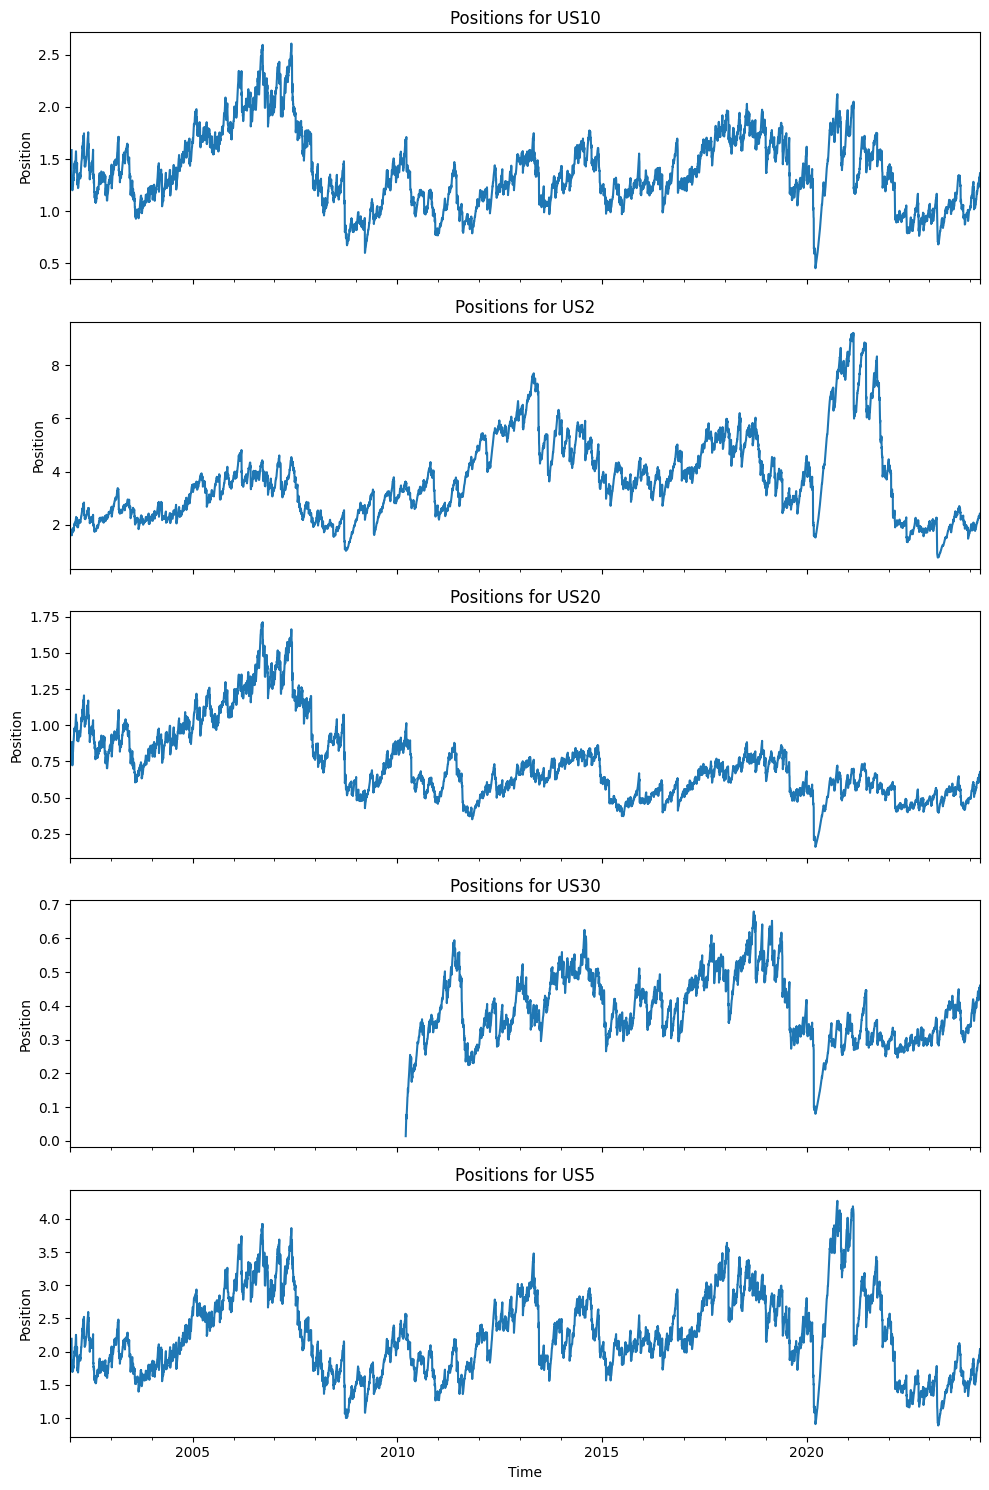

In [7]:
# Plot positions for each instrument

import matplotlib.pyplot as plt
import pandas as pd

# Get all instruments
instruments = my_system.get_instrument_list()

# Create a figure with subplots
fig, axes = plt.subplots(len(instruments), 1, figsize=(10, 3*len(instruments)), sharex=True)

# Plot each instrument's position
for i, instrument in enumerate(instruments):
    position = my_system.portfolio.get_notional_position(instrument)
    position.plot(ax=axes[i])
    axes[i].set_title(f'Positions for {instrument}')
    axes[i].set_ylabel('Position')

# Set common x-label
plt.xlabel('Time')
plt.tight_layout()